# K-Means Clustering Iris Data
Langkah-langkah Algoritma K-Means pada Dataset Iris
##1. Tentukan jumlah kluster (K)
Misalnya, kita ingin membagi data menjadi K = 3 kluster (karena di dataset Iris ada 3 spesies bunga).

`kmeans = KMeans(n_clusters=3, random_state=42)`

Menentukan bahwa data akan dikelompokkan menjadi 3 klaster.

##2. Pilih K centroid awal secara acak
Pilih secara acak K buah data dari dataset sebagai centroid awal.
Misalnya, kita acak pilih 3 titik sebagai centroid awal.

Ini dilakukan otomatis oleh Scikit-learn ketika KMeans dibuat dan saat `fit_predict()` dipanggil.
Secara default menggunakan metode k-means++ untuk memilih centroid awal yang tersebar baik.

##3. Hitung jarak setiap data ke tiap centroid
Gunakan metrik seperti Euclidean distance untuk menghitung jarak dari setiap titik data ke masing-masing centroid.



```
labels = kmeans.fit_predict(X)

```

`fit_predict():`

* Menghitung jarak dari setiap titik ke semua centroid
* Mengembalikan label klaster (disimpan di labels)

##4. Kelompokkan data berdasarkan centroid terdekat
Setiap data akan masuk ke kluster yang memiliki centroid terdekat dengannya.



```
labels = kmeans.fit_predict(X)

```

Data dikelompokkan berdasarkan centroid terdekat → label 0, 1, atau 2 disimpan di labels.

##5. Hitung ulang centroid dari rata-rata anggota kluster
Untuk tiap kluster, hitung rata-rata (mean) dari semua anggota fitur (misalnya panjang dan lebar kelopak/daun), lalu jadikan hasilnya sebagai centroid baru.

```
centroids = kmeans.cluster_centers_

```

Setelah setiap iterasi, centroid dihitung ulang sebagai rata-rata dari semua anggota dalam klaster tersebut.

##6. Ulangi langkah 3–5 hingga konvergen
Lanjutkan proses:

  * Hitung ulang jarak ke centroid baru
  * Kelompokkan ulang
  * Update centroid
Ulangi hingga tidak ada perubahan signifikan (misalnya kluster tidak berubah lagi atau perubahan centroid sangat kecil).

Semua ini terjadi secara otomatis dalam `fit_predict()` hingga:

* Klaster stabil
* Atau batas iterasi tercapai

#💡 Reminder! (Terkait Data Iris)
Dataset Iris memiliki 150 data bunga dengan 4 fitur:

* Sepal Length, Sepal Width, Petal Length, Petal Width

Cocok untuk clustering karena terdiri dari 3 kelas bunga:

* Setosa, Versicolor, Virginica (tidak digunakan secara eksplisit di K-Means karena unsupervised)

#Implementasi algoritma K-Means pada dataset Iris menggunakan Python + Scikit-learn


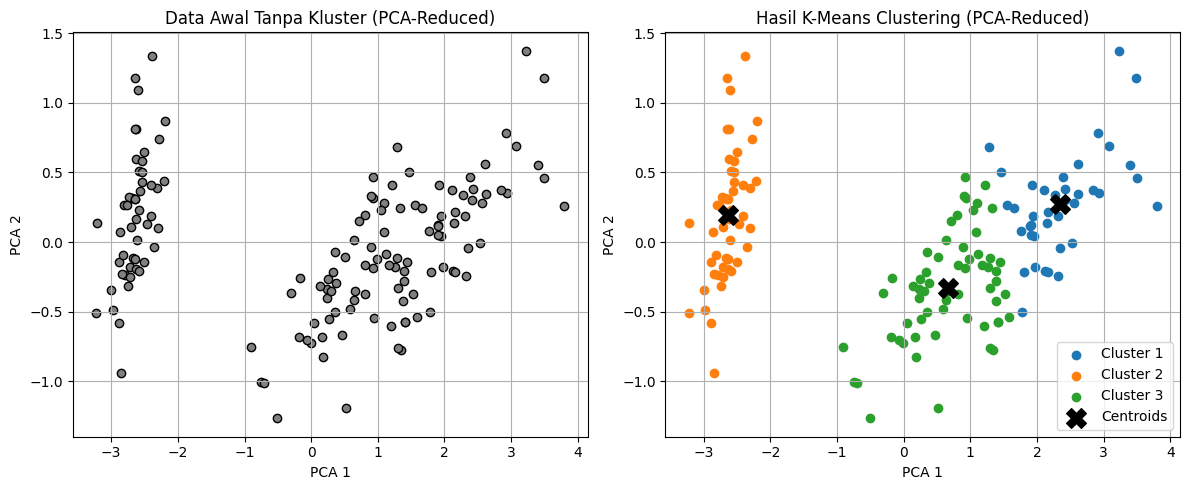

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset
iris = load_iris()
X = iris.data        # Fitur (4 dimensi: sepal length, sepal width, petal length, petal width)
y = iris.target      # Label asli (tidak digunakan langsung dalam clustering)

# PCA untuk reduksi 4 dimensi ke 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi data asli tanpa label cluster (tidak ada warna berbeda)
plt.figure(figsize=(12, 5))

# Plot 1: Data awal tanpa cluster
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', edgecolor='k')
plt.title('Data Awal Tanpa Kluster (PCA-Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X) # Hasil prediksi cluster untuk setiap data poin
centroids = kmeans.cluster_centers_ # Pusat dari tiap cluster dalam ruang asli 4D.
centroids_pca = pca.transform(centroids) # Proyeksi dari centroid ke ruang PCA 2D agar bisa divisualisasikan.

# Plot 2: Hasil clustering
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', c='black', s=200, label='Centroids')
plt.title('Hasil K-Means Clustering (PCA-Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
